### Importação dos dados



In [ ]:
import pandas as pd

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_1.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_4.csv"

loja = pd.read_csv(url)
loja2 = pd.read_csv(url2)
loja3 = pd.read_csv(url3)
loja4 = pd.read_csv(url4)

loja.head()


,Produto,Categoria do Produto,Preço,Frete,Data da Compra,Vendedor,Local da compra,Avaliação da compra,Tipo de pagamento,Quantidade de parcelas,lat,lon
0,Assistente virtual,eletronicos,219.08,9.249790,16/01/2021,Pedro Gomes,SP,4,cartao_credito,8,-22.19,-48.79
1,Mesa de jantar,moveis,256.35,11.234305,18/05/2022,Beatriz Moraes,RJ,1,cartao_credito,4,-22.25,-42.66
2,Jogo de tabuleiro,brinquedos,279.51,21.262681,15/03/2021,João Souza,DF,1,cartao_credito,1,-15.83,-47.86
3,Micro-ondas,eletrodomesticos,1009.99,54.667344,03/05/2022,João Souza,RS,4,boleto,1,-30.17,-53.50
4,Cadeira de escritório,moveis,446.99,26.964689,07/11/2020,Larissa Alves,MG,5,boleto,1,-18.10,-44.38


In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import seaborn as sns


In [ ]:
loja1 = pd.read_csv(url)
loja1["Loja"] = "Loja 1"
loja1.head()

loja2 = pd.read_csv(url2)
loja2["Loja"] = "Loja 2"
loja2.head()

loja3 = pd.read_csv(url3)
loja3["Loja"] = "Loja 3"
loja3.head()

loja4 = pd.read_csv(url4)
loja4["Loja"] = "Loja 4"
loja4.head()


loja = pd.concat([loja1, loja2, loja3, loja4])
loja["vendas"] = 1
loja.head()

,Produto,Categoria do Produto,Preço,Frete,Data da Compra,Vendedor,Local da compra,Avaliação da compra,Tipo de pagamento,Quantidade de parcelas,lat,lon,Loja,vendas
0,Assistente virtual,eletronicos,219.08,9.249790,16/01/2021,Pedro Gomes,SP,4,cartao_credito,8,-22.19,-48.79,Loja 1,1
1,Mesa de jantar,moveis,256.35,11.234305,18/05/2022,Beatriz Moraes,RJ,1,cartao_credito,4,-22.25,-42.66,Loja 1,1
2,Jogo de tabuleiro,brinquedos,279.51,21.262681,15/03/2021,João Souza,DF,1,cartao_credito,1,-15.83,-47.86,Loja 1,1
3,Micro-ondas,eletrodomesticos,1009.99,54.667344,03/05/2022,João Souza,RS,4,boleto,1,-30.17,-53.50,Loja 1,1
4,Cadeira de escritório,moveis,446.99,26.964689,07/11/2020,Larissa Alves,MG,5,boleto,1,-18.10,-44.38,Loja 1,1


#1. Análise do faturamento



In [ ]:
#Faturamento por loja (preço)

faturamento_por_loja = loja.groupby("Loja")["Preço"].sum().reset_index(name = "Faturamento")

print(faturamento_por_loja)

     Loja  Faturamento
0  Loja 1   1534509.12
1  Loja 2   1488459.06
2  Loja 3   1464025.03
3  Loja 4   1384497.58


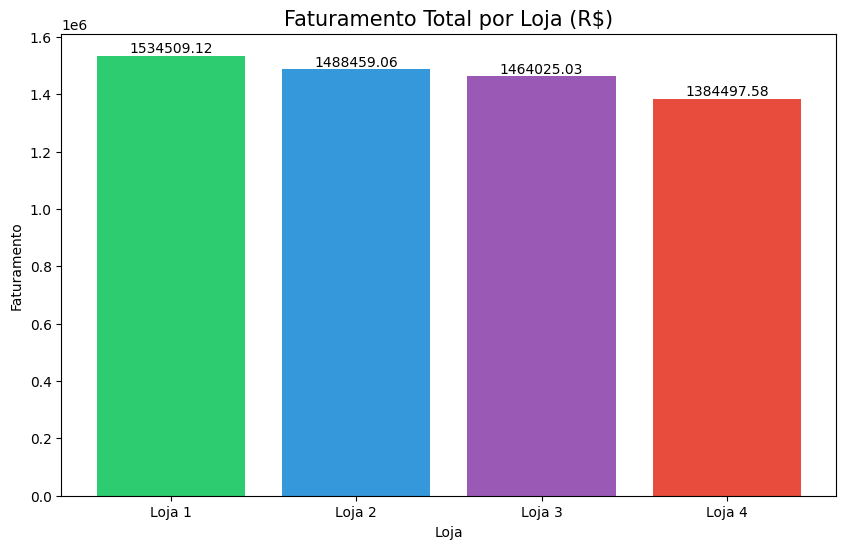

In [ ]:
cores = ["#2ecc71", "#3498db", "#9b59b6", "#e74c3c"]

plt.figure(figsize = (10,6))
plt.bar(faturamento_por_loja["Loja"], faturamento_por_loja["Faturamento"], color = cores)

for i, valor in enumerate(faturamento_por_loja["Faturamento"]):
    plt.text(i, valor, str(valor), ha='center', va='bottom')

plt.xlabel("Loja")
plt.ylabel("Faturamento")
plt.title("Faturamento Total por Loja (R$)",fontsize = 15)

plt.show()




In [ ]:
#Faturamento total

Faturamento_total = loja["Preço"].sum().round(2)
print(Faturamento_total)

5871490.79


In [ ]:
#Qto corresponde o Faturamento de cada loja em porcentagem ao faturamento total

faturamento_por_loja["porcentagem"] = (faturamento_por_loja["Faturamento"] / Faturamento_total) * 100
faturamento_por_loja["porcentagem"] = faturamento_por_loja["porcentagem"].round(2)
print(faturamento_por_loja)

     Loja  Faturamento  porcentagem
0  Loja 1   1534509.12        26.13
1  Loja 2   1488459.06        25.35
2  Loja 3   1464025.03        24.93
3  Loja 4   1384497.58        23.58


In [ ]:
#faturamento anual considerando o apenas os meses completo, sendo que 2023 só temos apenas 3 de faturamento

loja["Data da Compra"] = pd.to_datetime(loja["Data da Compra"], format='%d/%m/%Y')
loja["Ano"] = loja["Data da Compra"].dt.year
ultimo_ano = loja["Ano"].max()
loja_sem_ultimo_ano = loja[loja["Ano"] != ultimo_ano]
faturamento_anual_loja = (loja_sem_ultimo_ano.groupby(["Loja","Ano"])["Preço"].sum().reset_index(name = "Faturamento Anual").sort_values(["Loja","Ano"]))
print(faturamento_anual_loja)

      Loja   Ano  Faturamento Anual
0   Loja 1  2020          491911.51
1   Loja 1  2021          482829.91
2   Loja 1  2022          422086.24
3   Loja 2  2020          427288.25
4   Loja 2  2021          468288.89
5   Loja 2  2022          477635.56
6   Loja 3  2020          428943.09
7   Loja 3  2021          483938.91
8   Loja 3  2022          467250.70
9   Loja 4  2020          441129.52
10  Loja 4  2021          463763.27
11  Loja 4  2022          402961.23


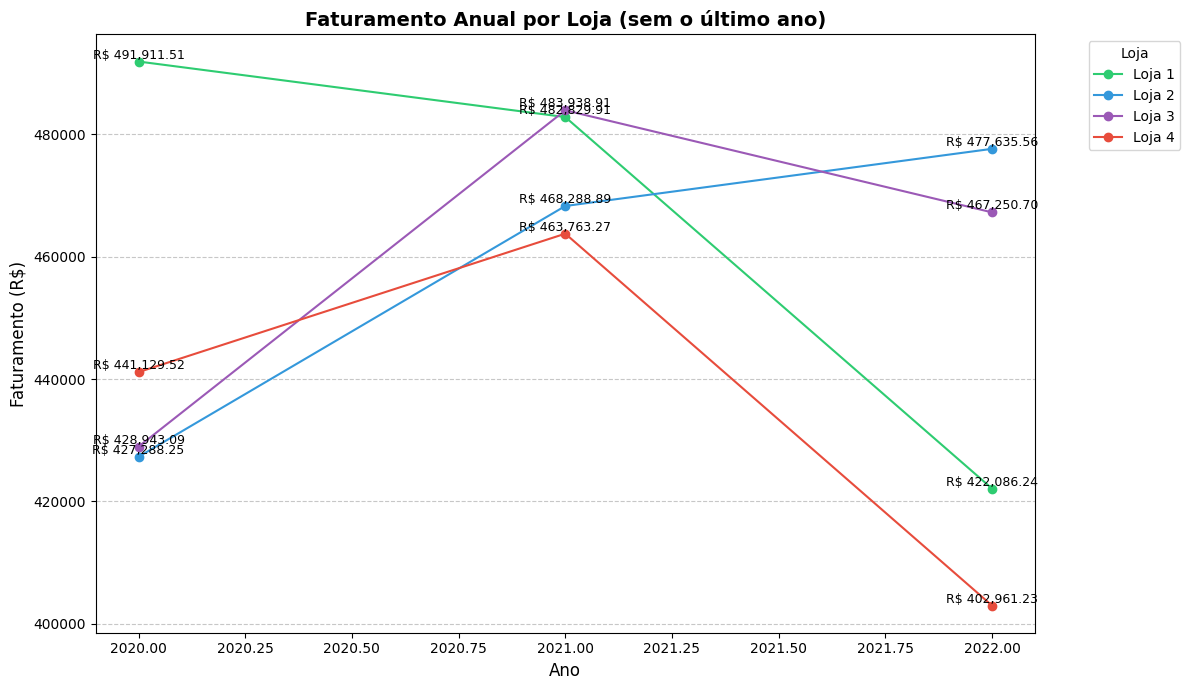

In [ ]:
cores = ["#2ecc71", "#3498db", "#9b59b6", "#e74c3c"]

plt.figure(figsize=(12, 7))

# Plotar o faturamento anual para cada loja com cores diferentes
for i, loja_nome in enumerate(faturamento_anual_loja["Loja"].unique()):
    df_loja = faturamento_anual_loja[faturamento_anual_loja["Loja"] == loja_nome]
    plt.plot(df_loja["Ano"], df_loja["Faturamento Anual"], 'o-', color=cores[i], label=loja_nome)
    for ano, valor in zip(df_loja["Ano"], df_loja["Faturamento Anual"]):
        plt.text(ano, valor, f"R$ {valor:,.2f}", ha='center', va='bottom', fontsize=9)

# Adicionar título e rótulos
plt.title("Faturamento Anual por Loja (sem o último ano)", fontsize=14, fontweight="bold")
plt.xlabel("Ano", fontsize=12)
plt.ylabel("Faturamento (R$)", fontsize=12)

# Grade e legenda
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend(title="Loja", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

In [ ]:
#faturamento anual considerando o ultimo ano que seria 2023
loja["Data da Compra"] = pd.to_datetime(loja["Data da Compra"], format='%d/%m/%Y')
loja["Ano"] = loja["Data da Compra"].dt.year
ultimo_ano = loja["Ano"].max()
loja_sem_ultimo_ano = loja[loja["Ano"] == ultimo_ano]
faturamento_anual_loja = (loja_sem_ultimo_ano.groupby(["Loja","Ano"])["Preço"].sum().reset_index(name = "Faturamento Anual").sort_values(["Loja","Ano"]))
print(faturamento_anual_loja)

     Loja   Ano  Faturamento Anual
0  Loja 1  2023          137681.46
1  Loja 2  2023          115246.36
2  Loja 3  2023           83892.33
3  Loja 4  2023           76643.56


# 2. Vendas por Categoria

In [ ]:
def contagem_vendas_categoria(df_loja):
    categorias = df_loja.groupby("Loja")["Categoria do Produto"].value_counts().reset_index(name="Quantidade")
    return categorias

loja = pd.concat([loja1, loja2, loja3, loja4])

contagem_vendas_categoria = contagem_vendas_categoria(loja)
print(contagem_vendas_categoria)

      Loja   Categoria do Produto  Quantidade
0   Loja 1                 moveis         465
1   Loja 1            eletronicos         448
2   Loja 1             brinquedos         324
3   Loja 1       eletrodomesticos         312
4   Loja 1        esporte e lazer         284
5   Loja 1  instrumentos musicais         182
6   Loja 1                 livros         173
7   Loja 1  utilidades domesticas         171
8   Loja 2                 moveis         442
9   Loja 2            eletronicos         422
10  Loja 2             brinquedos         313
11  Loja 2       eletrodomesticos         305
12  Loja 2        esporte e lazer         275
13  Loja 2  instrumentos musicais         224
14  Loja 2                 livros         197
15  Loja 2  utilidades domesticas         181
16  Loja 3                 moveis         499
17  Loja 3            eletronicos         451
18  Loja 3             brinquedos         315
19  Loja 3       eletrodomesticos         278
20  Loja 3        esporte e lazer 

In [ ]:
categoria_mais_populares = contagem_vendas_categoria.loc[contagem_vendas_categoria.groupby('Loja')['Quantidade'].idxmax()]
print(categoria_mais_populares)

      Loja Categoria do Produto  Quantidade
0   Loja 1               moveis         465
8   Loja 2               moveis         442
16  Loja 3               moveis         499
24  Loja 4               moveis         480


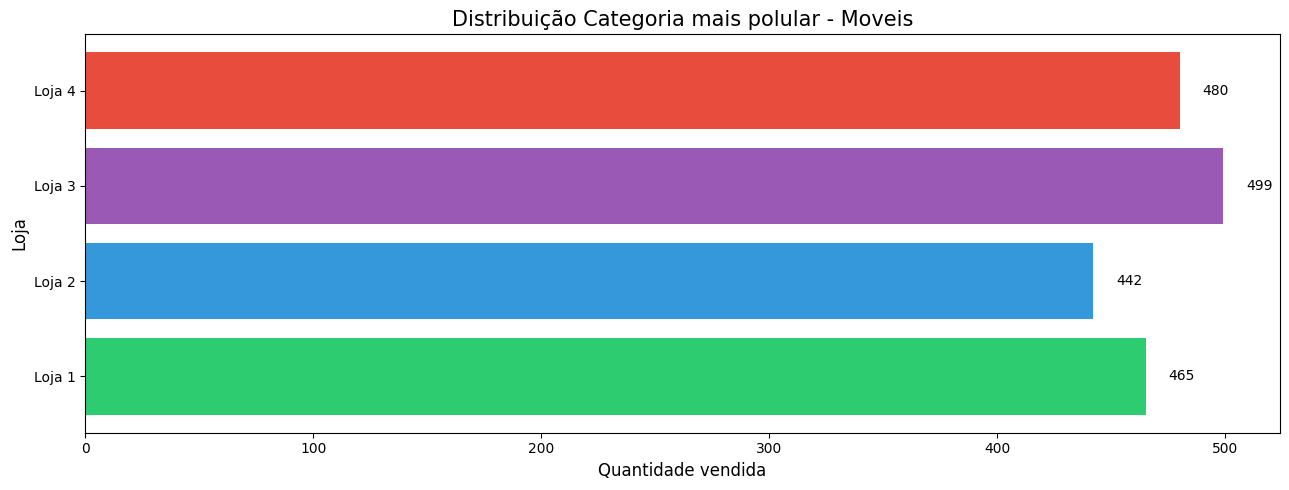

In [ ]:
plt.clf()   # limpa figuras anteriores
plt.close() # fecha gráficos abertos

cores = ["#2ecc71", "#3498db", "#9b59b6", "#e74c3c"]

plt.figure(figsize = (13,5))
plt.barh(categoria_mais_populares["Loja"], categoria_mais_populares["Quantidade"], color = cores);

for i, valor in enumerate(categoria_mais_populares["Quantidade"]):
     plt.text(valor + 10, i, str(valor), va='center', fontsize=10)

plt.xlabel("Quantidade vendida", fontsize = 12)
plt.ylabel("Loja",fontsize = 12)
plt.title("Distribuição Categoria mais polular - Moveis",fontsize = 15)
plt.tight_layout()
plt.show()

In [ ]:
categoria_menos_populares = contagem_vendas_categoria.loc[contagem_vendas_categoria.groupby('Loja')['Quantidade'].idxmin()]
print(categoria_menos_populares)

      Loja   Categoria do Produto  Quantidade
7   Loja 1  utilidades domesticas         171
15  Loja 2  utilidades domesticas         181
22  Loja 3  instrumentos musicais         177
31  Loja 4  instrumentos musicais         170


# 3. Média de Avaliação das Lojas


In [ ]:
media_avaliacao_loja = loja.groupby("Loja")["Avaliação da compra"].mean().reset_index(name="Media de avaliação").round(2)
print(media_avaliacao_loja)

     Loja  Media de avaliação
0  Loja 1                3.98
1  Loja 2                4.04
2  Loja 3                4.05
3  Loja 4                4.00


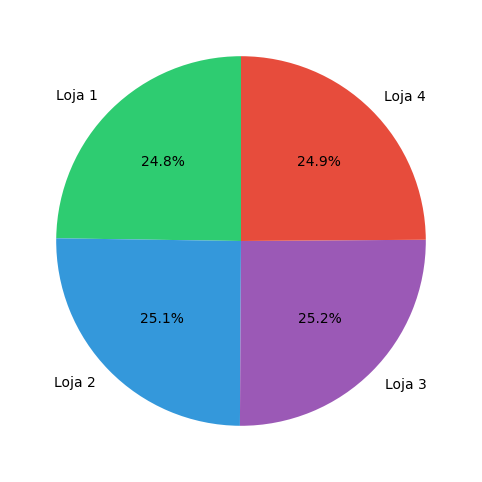

In [ ]:
plt.figure(figsize = (10,6))
plt.pie(media_avaliacao_loja["Media de avaliação"], labels = media_avaliacao_loja["Loja"], autopct = "%1.1f%%", startangle = 90, colors = cores);

# 4. Produtos Mais e Menos Vendidos

In [ ]:
produto_mais_vendido = loja.groupby("Loja")["Produto"].value_counts().reset_index(name="Quantidade")
produto_mais_vendido = produto_mais_vendido.loc[produto_mais_vendido.groupby('Loja')['Quantidade'].idxmax()]
print(produto_mais_vendido)

       Loja                   Produto  Quantidade
0    Loja 1             Guarda roupas          60
51   Loja 2  Iniciando em programação          65
102  Loja 3             Kit banquetas          57
153  Loja 4                  Cama box          62


In [ ]:
produto_menos_vendido = loja.groupby("Loja")["Produto"].value_counts().reset_index(name="Quantidade")
produto_menos_vendido = produto_menos_vendido.loc[produto_menos_vendido.groupby('Loja')['Quantidade'].idxmin()]
print(produto_menos_vendido)

       Loja            Produto  Quantidade
49   Loja 1       Celular ABXY          33
101  Loja 2  Jogo de tabuleiro          32
152  Loja 3   Blocos de montar          35
203  Loja 4           Guitarra          33


In [ ]:
Total_produto_vendido_por_loja = loja.groupby("Loja")["Produto"].count().reset_index(name="Total produto vendido")


print(Total_produto_vendido_por_loja)

     Loja  Total produto vendido
0  Loja 1                   2359
1  Loja 2                   2359
2  Loja 3                   2359
3  Loja 4                   2358


# 5. Frete Médio por Loja

In [ ]:
frete_por_loja = loja.groupby("Loja")["Frete"].mean().reset_index(name="Frete médio").round(2)
print(frete_por_loja)

     Loja  Frete médio
0  Loja 1        34.69
1  Loja 2        33.62
2  Loja 3        33.07
3  Loja 4        31.28


#EXTRA

#6. Local de vendas por loja

In [ ]:
estado_mais_compras = loja.groupby("Loja")["Local da compra"].value_counts().reset_index(name="Quantidade")
estado_mais_compras = estado_mais_compras.loc[estado_mais_compras.groupby('Loja')['Quantidade'].idxmax()]
print(estado_mais_compras)

      Loja Local da compra  Quantidade
0   Loja 1              SP         984
26  Loja 2              SP         985
52  Loja 3              SP         983
79  Loja 4              SP         991


In [ ]:
vendas_por_estado_por_loja = ( loja.groupby(["Loja", "Local da compra"]) .size() .reset_index(name="Quantidade") )
print(vendas_por_estado_por_loja)

       Loja Local da compra  Quantidade
0    Loja 1              AC           1
1    Loja 1              AL          15
2    Loja 1              AM           3
3    Loja 1              AP           4
4    Loja 1              BA          75
..      ...             ...         ...
99   Loja 4              RS         127
100  Loja 4              SC          80
101  Loja 4              SE           3
102  Loja 4              SP         991
103  Loja 4              TO           7

[104 rows x 3 columns]


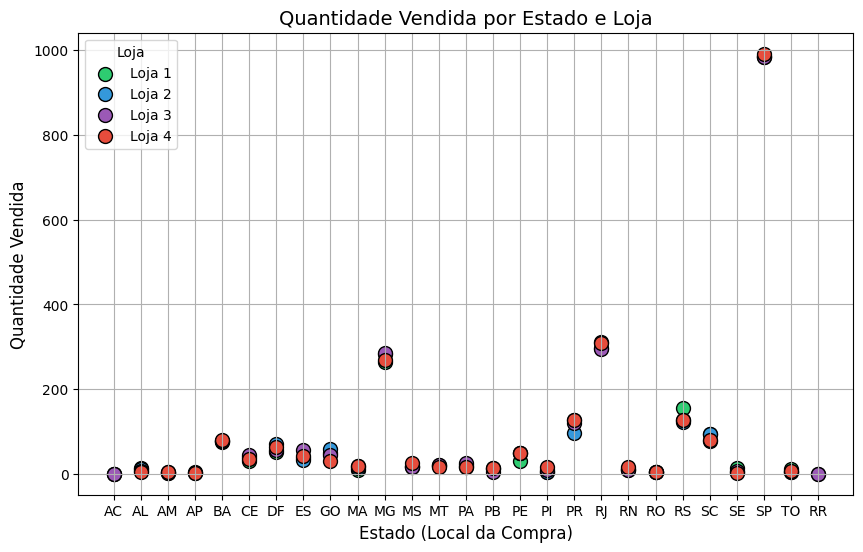

In [ ]:
plt.figure(figsize=(10, 6))

# Loop para plotar cada loja com uma cor diferente
for i, (loja_nome, grupo) in enumerate(vendas_por_estado_por_loja.groupby("Loja")):
    plt.scatter(
        grupo["Local da compra"],
        grupo["Quantidade"],
        label=loja_nome,
        color=cores[i % len(cores)],  # repete as cores se tiver mais lojas
        edgecolor="black",
        s=100  # tamanho dos pontos
    )

# Personaliza o gráfico
plt.title("Quantidade Vendida por Estado e Loja", fontsize=14)
plt.xlabel("Estado (Local da Compra)", fontsize=12)
plt.ylabel("Quantidade Vendida", fontsize=12)
plt.legend(title="Loja")
plt.grid(True)
plt.show()

In [ ]:
def vendas_por_estado(df, nome_loja):
    filtro = df[df["Loja"] == nome_loja]
    vendas_estado = (
        filtro.groupby("Local da compra")["Quantidade"]
        .sum()
        .reset_index()
        .sort_values("Quantidade", ascending=False)
    )
    return vendas_estado

In [ ]:
resultado_loja1 = vendas_por_estado(vendas_por_estado_por_loja, "Loja 1")
resultado_loja1= resultado_loja1.groupby(["Local da compra", "Quantidade"]).sum().reset_index().sort_values("Quantidade", ascending=False)
print(resultado_loja1)

   Local da compra  Quantidade
24              SP         984
18              RJ         298
10              MG         265
21              RS         155
17              PR         128
22              SC          95
4               BA          75
6               DF          53
8               GO          51
7               ES          38
5               CE          32
15              PE          31
13              PA          22
12              MT          22
11              MS          18
1               AL          15
23              SE          14
14              PB          14
25              TO          11
9               MA          10
19              RN           9
16              PI           6
20              RO           5
3               AP           4
2               AM           3
0               AC           1


In [ ]:
resultado_loja4 = vendas_por_estado(vendas_por_estado_por_loja, "Loja 4")
resultado_loja4= resultado_loja4.groupby(["Local da compra", "Quantidade"]).sum().reset_index().sort_values("Quantidade", ascending=False)
print(resultado_loja4)

   Local da compra  Quantidade
23              SP         991
17              RJ         308
9               MG         269
16              PR         127
20              RS         127
21              SC          80
3               BA          80
5               DF          63
14              PE          50
6               ES          42
4               CE          35
7               GO          32
10              MS          27
8               MA          19
15              PI          18
12              PA          17
18              RN          16
11              MT          16
13              PB          14
24              TO           7
0               AL           6
19              RO           4
1               AM           4
2               AP           3
22              SE           3


In [ ]:
resultado_loja2 = vendas_por_estado(vendas_por_estado_por_loja, "Loja 2")
resultado_loja2= resultado_loja2.groupby(["Local da compra", "Quantidade"]).sum().reset_index().sort_values("Quantidade", ascending=False)
print(resultado_loja2)

   Local da compra  Quantidade
24              SP         985
17              RJ         311
9               MG         283
21              RS         124
16              PR          98
22              SC          94
3               BA          78
5               DF          70
7               GO          59
14              PE          50
4               CE          40
6               ES          34
11              MT          20
10              MS          19
12              PA          16
8               MA          14
1               AL          13
18              RN          13
13              PB          12
15              PI           6
25              TO           6
2               AM           4
23              SE           4
19              RO           4
0               AC           1
20              RR           1


In [ ]:
resultado_loja3 = vendas_por_estado(vendas_por_estado_por_loja, "Loja 3")
resultado_loja3= resultado_loja3.groupby(["Local da compra", "Quantidade"]).sum().reset_index().sort_values("Quantidade", ascending=False)
print(resultado_loja3)

   Local da compra  Quantidade
25              SP         983
18              RJ         295
10              MG         285
22              RS         128
17              PR         120
4               BA          77
23              SC          77
7               ES          57
6               DF          56
15              PE          50
8               GO          44
5               CE          44
13              PA          26
12              MT          22
9               MA          19
11              MS          18
16              PI          10
19              RN          10
1               AL           7
24              SE           7
14              PB           6
20              RO           6
26              TO           5
2               AM           3
3               AP           2
0               AC           1
21              RR           1



#Analisando a forma de pagamento (Tipo de pagamento)

In [ ]:
tipo_pagamento =  {"cartao_credito","boleto","cupom","cartao_debito"}

In [ ]:
df_pagamento_por_loja = loja.groupby(["Loja","Tipo de pagamento"], observed=False)["Preço"].sum().reset_index().sort_values("Preço", ascending=False)
print(df_pagamento_por_loja)

      Loja Tipo de pagamento       Preço
1   Loja 1    cartao_credito  1120887.66
5   Loja 2    cartao_credito  1088879.31
9   Loja 3    cartao_credito  1072760.47
13  Loja 4    cartao_credito  1024944.60
0   Loja 1            boleto   310147.09
8   Loja 3            boleto   305762.67
4   Loja 2            boleto   280998.45
12  Loja 4            boleto   277337.97
7   Loja 2             cupom   103156.31
3   Loja 1             cupom    85475.32
11  Loja 3             cupom    63215.19
15  Loja 4             cupom    62648.28
10  Loja 3     cartao_debito    22286.70
14  Loja 4     cartao_debito    19566.73
2   Loja 1     cartao_debito    17999.05
6   Loja 2     cartao_debito    15424.99


In [ ]:
df_pagamento_por_loja = df_pagamento_por_loja.pivot(index="Loja", columns="Tipo de pagamento", values="Preço")
print(df_pagamento_por_loja)

Tipo de pagamento     boleto  cartao_credito  cartao_debito      cupom
Loja                                                                  
Loja 1             310147.09      1120887.66       17999.05   85475.32
Loja 2             280998.45      1088879.31       15424.99  103156.31
Loja 3             305762.67      1072760.47       22286.70   63215.19
Loja 4             277337.97      1024944.60       19566.73   62648.28


In [ ]:
tp= loja.groupby("Loja")["Tipo de pagamento"].value_counts().reset_index(name="Quantidade").sort_values("Quantidade", ascending=False)
print(tp)

      Loja Tipo de pagamento  Quantidade
8   Loja 3    cartao_credito        1753
4   Loja 2    cartao_credito        1721
12  Loja 4    cartao_credito        1720
0   Loja 1    cartao_credito        1704
1   Loja 1            boleto         483
13  Loja 4            boleto         482
9   Loja 3            boleto         468
5   Loja 2            boleto         467
6   Loja 2             cupom         141
2   Loja 1             cupom         137
14  Loja 4             cupom         125
10  Loja 3             cupom         101
11  Loja 3     cartao_debito          37
3   Loja 1     cartao_debito          35
15  Loja 4     cartao_debito          31
7   Loja 2     cartao_debito          30


#Avaliação Final entre a loja 1 e a loja 4:




In [ ]:
#faturamento Total
loja_1 = 1534509.12
loja_4 = 1384497.58

dif_percent = ((loja_1 - loja_4) / loja_4) * 100
dif_percent = round(dif_percent, 1)

print(f"A Loja 1 tem {dif_percent:.2f}% a mais de faturamento que a Loja 4.")

A Loja 1 tem 10.80% a mais de faturamento que a Loja 4.


In [ ]:
#Frete Medio
lojas = ['Loja 1', 'Loja 4']
frete_medio = [34.69, 31.28]
cores = ["#2ecc71",  "#e74c3c"]

# Cálculo da diferença percentual
dif_percent = ((frete_medio[0] - frete_medio[1]) / frete_medio[1]) * 100
dif_percent

10.90153452685421

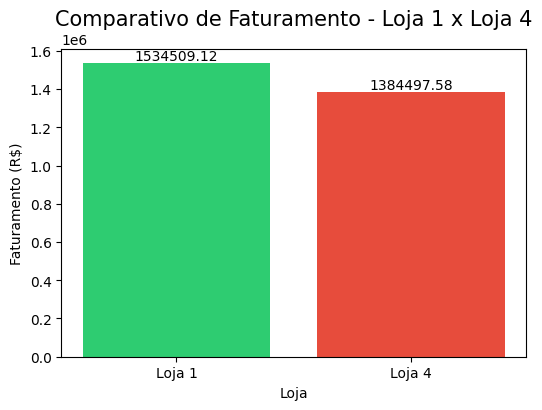

In [ ]:
#grafico faturamento lojas 1  e 4
faturamento_lojas_1_4 = faturamento_por_loja[faturamento_por_loja["Loja"].isin(["Loja 1", "Loja 4"])]
plt.figure(figsize = (6,4))
plt.bar(faturamento_lojas_1_4["Loja"], faturamento_lojas_1_4["Faturamento"], color = cores)

for i, valor in enumerate(faturamento_lojas_1_4["Faturamento"]):
    plt.text(i, valor, str(valor), ha='center', va='bottom')

plt.xlabel("Loja")
plt.ylabel("Faturamento (R$)")
plt.title("Comparativo de Faturamento - Loja 1 x Loja 4", fontsize=15)
plt.show()

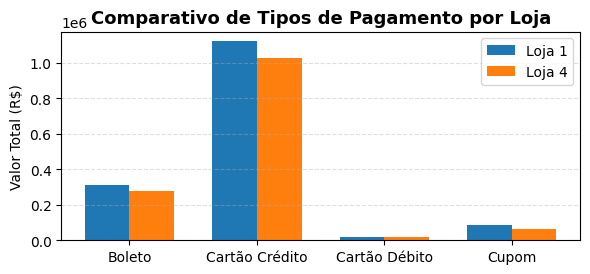

In [ ]:
# analisando os tipos de pagamento das lojas 1 e 4, criando um dicionario
import matplotlib.pyplot as plt
import numpy as np

# Dicionário com os dados
dados = {
    'boleto': [310147.09, 277337.97],
    'cartao_credito': [1120887.66, 1024944.60],
    'cartao_debito': [17999.05, 19566.73],
    'cupom': [85475.32, 62648.28]
}

# Lojas e dados prontos para o gráfico
lojas = ['Loja 1', 'Loja 4']
tipos = list(dados.keys())
valores = np.array(list(dados.values())).T  # transpõe para facilitar o plot

# Criação do gráfico
x = np.arange(len(tipos))
largura = 0.35

plt.figure(figsize=(6,3))
for i in range(len(lojas)):
    plt.bar(x + (i - 0.5)*largura, valores[i], largura, label=lojas[i])

plt.xticks(x, ['Boleto', 'Cartão Crédito', 'Cartão Débito', 'Cupom'])
plt.title('Comparativo de Tipos de Pagamento por Loja', fontsize=13, fontweight='bold')
plt.ylabel('Valor Total (R$)')
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.4)
plt.tight_layout()
plt.savefig("grafico_comparativo_pagamento .png", dpi=300, bbox_inches='tight')
plt.show()



In [ ]:
#faturamento anual considerando o ultimo ano que seria 2023
loja["Data da Compra"] = pd.to_datetime(loja["Data da Compra"], format='%d/%m/%Y')
loja["Ano"] = loja["Data da Compra"].dt.year
ultimo_ano = loja["Ano"].max()
loja_sem_ultimo_ano = loja[loja["Ano"] == ultimo_ano]
faturamento_anual_loja = (loja_sem_ultimo_ano.groupby(["Loja","Ano"])["Preço"].sum().reset_index(name = "Faturamento Anual").sort_values(["Loja","Ano"]))
faturamento_lojas_1e4 = faturamento_anual_loja[faturamento_anual_loja["Loja"].isin(["Loja 1", "Loja 4"])]
print(faturamento_lojas_1e4)

     Loja   Ano  Faturamento Anual
0  Loja 1  2023          137681.46
3  Loja 4  2023           76643.56


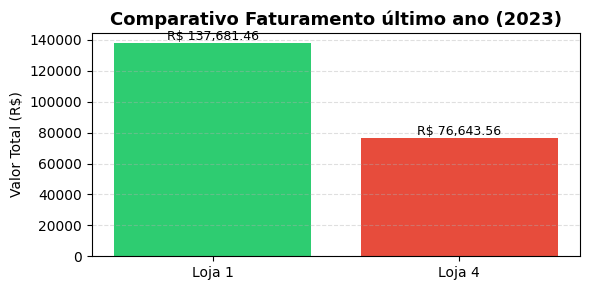

In [ ]:
# Comparativo faturamento de 2023 entre as lojas 1 e 4
df_faturamento_2023 = faturamento_lojas_1e4

lojas_labels = df_faturamento_2023["Loja"].tolist()
faturamento_values = df_faturamento_2023["Faturamento Anual"].tolist()

plt.figure(figsize=(6,3))
plt.bar(lojas_labels, faturamento_values, color=cores)

for i, valor in enumerate(faturamento_values):
    plt.text(i, valor, f"R$ {valor:,.2f}", ha='center', va='bottom', fontsize=9)

plt.title('Comparativo Faturamento último ano (2023)', fontsize=13, fontweight='bold')
plt.ylabel('Valor Total (R$)')
plt.grid(axis='y', linestyle='--', alpha=0.4)
plt.tight_layout()
plt.savefig("grafico_comparativo_faturamento_2023.png", dpi=300, bbox_inches='tight')
plt.show()


#Desafio Alura Store

O desafio Allure Store, análise de vendas e desempenho de lojas, tem como objetivo ajudar o Senhor João a decidir qual loja vender para investir em um novo negócio. Você foi contratado como pessoa analista de dados para ajudar Sr. João a decidir qual loja ele deve vender.

O Sr. João tem uma rede de quatro lojas, que pertencem ao e-commerce Alura Store. Ele quer vender uma dessas lojas para ter um capital e investir em um novo negócio. Você, como pessoa analista de dados, vai analisar qual dessas lojas tem o menor desempenho comparado às outras e, baseado nisso, fazer um relatório e mostrar para Sr.João qual loja ele deve vender.

Para isso, você vai analisar as seguintes métricas: faturamento total de cada loja, categorias mais populares, média de avaliação dos clientes, produtos mais e menos vendidos e custo médio do frete. Com essas métricas, você será capaz de decidir qual loja Sr.João deve vender.



#Relatório Final

**# 1 - Introdução:**

O  relatório tem como objetivo avaliar o desempenho das lojas do Sr. João e entender qual delas poderia ser encerrada para investir em um novo negógio.
A análise foi conduzida com base em métricas financeiras, operacionais e de satisfação do cliente, além de considerar tendências de crescimento e comportamento de vendas por tipo de pagamento e local de compra.

Foram utilizadas as seguintes informações:

- Faturamento total;

- Média de avaliação dos clientes;

- Valor médio de frete;

- Distribuição das vendas por tipo de pagamento (boleto, cartão de crédito, cartão de débito e cupom);

- Tendência de desempenho ao longo dos últimos anos;

- Regiões de atuação.

As análises foram complementadas por gráficos comparativos e indicadores percentuais, permitindo visualizar de forma clara os pontos fortes e fracos de cada loja.

Conforme dados apurados tivemos vendas durante todos os anos de 2020,2021,2022 e 2023 porém o ultimo ano tivemos apenas os lançamentos nos 3 primeiros meses do ano.


#2 - Desenvolvimento:

Apos as analises percebi que as lojas 1 e 4 tem as maiores possibilidades de uma delas ser encerrrada, a loja1 que tem um frete maior que as outras lojas e loja 4 que tem o faturamento menor que as outras. Por esse motivo, segue no relatório as analises comparando as lojas 1 e 4.

##2.1 - Faturamento:

| Loja   | Faturamento Total (R$) |
| ------ | ---------------------- |
| Loja 1 | **1.534.509,12**       |
| Loja 4 | 1.384.497,58           |

- A Loja 1 apresenta faturamento 10,8% superior ao da Loja 4, demonstrando maior volume de vendas e melhor desempenho financeiro global.
- Isso mostra maior potencial de geração de receitas.






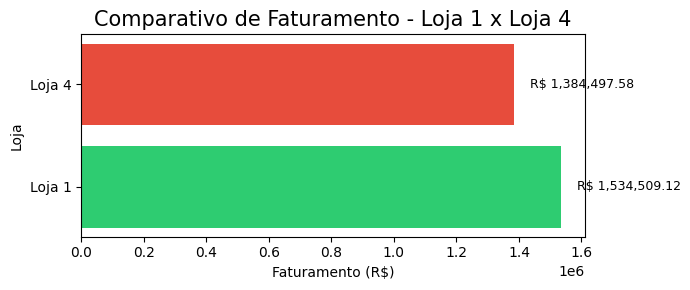

In [ ]:
faturamento_lojas_1_4 = faturamento_por_loja[faturamento_por_loja["Loja"].isin(["Loja 1", "Loja 4"])].copy()
plt.figure(figsize = (7,3))

plt.barh(faturamento_lojas_1_4["Loja"], faturamento_lojas_1_4["Faturamento"], color = cores)

for i, valor in enumerate(faturamento_lojas_1_4["Faturamento"]):
    plt.text(valor + 50000, i, f"R$ {valor:,.2f}", ha='left', va='center', fontsize=9)

plt.xlabel("Faturamento (R$)")
plt.ylabel("Loja")
plt.title("Comparativo de Faturamento - Loja 1 x Loja 4", fontsize=15)
plt.tight_layout()
plt.show()

##2.3 - Avaliação dos Clientes:

| Loja   | Média de Avaliação |
| ------ | ------------------ |
| Loja 1 | 3,98               |
| Loja 4 | **4,00**           |

As duas lojas possuem avaliações praticamente equivalentes, com diferença de apenas 0,02 ponto — um valor insignificante estatisticamente.
Portanto, o fator “avaliação do cliente” não é determinante para a decisão de fechamento.

##2.4-Frete Médio

| Loja   | Frete Médio (R$) |
| ------ | ---------------- |
| Loja 1 | 34,69            |
| Loja 4 | **31,28**        |

A Loja 4 apresenta frete médio 10% mais baixo, o que pode representar leve vantagem competitiva em relação ao custo final para o cliente.
Entretanto, o impacto desse fator é reduzido quando comparado à diferença de faturamento e lucratividade geral.




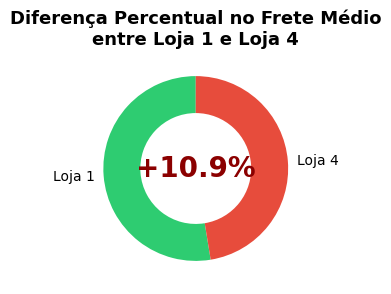

In [ ]:
import matplotlib.pyplot as plt

# Dados
lojas = ['Loja 1', 'Loja 4']
frete_medio = [34.69, 31.28]
cores = ["#2ecc71",  "#e74c3c"]

# Cálculo da diferença percentual
dif_percent = ((frete_medio[0] - frete_medio[1]) / frete_medio[1]) * 100

# Criação do gráfico
fig, ax = plt.subplots(figsize=(5,3))
wedges, texts = ax.pie(
    frete_medio,
    labels=lojas,
    startangle=90,
    colors=cores,
    wedgeprops={'width': 0.4}  # cria o "anel"
)

# Adiciona apenas o texto central (diferença percentual)
plt.text(0, 0, f'+{dif_percent:.1f}%',
         ha='center', va='center',
         fontsize=20, color='darkred', fontweight='bold')
plt.title('Diferença Percentual no Frete Médio\nentre Loja 1 e Loja 4', fontsize=13, fontweight='bold')

plt.show()


##2.5 - Tipos de pagamento:

| Tipo de Pagamento

 | Loja 1       |                         | Loja 4   |
| ----------------- | ---------------- | ------------- |

| Boleto            | **310.147,09**   | 277.337,97    |

| Cartão de Crédito | **1.120.887,66** | 1.024.944,60  |

| Cartão de Débito  | 17.999,05        | **19.566,73** |

| Cupom             | **85.475,32**    | 62.648,28     |

- A Loja 1 supera a Loja 4 em praticamente todos os meios de pagamento, especialmente em cartão de crédito, que representa a maior parcela do faturamento.
- A diversificação e volume de transações indicam uma base de clientes mais ampla e engajada.







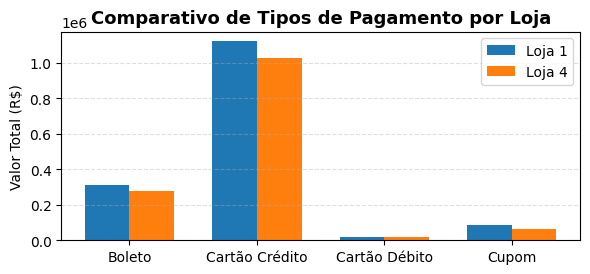

In [ ]:

dados = {
    'boleto': [310147.09, 277337.97],
    'cartao_credito': [1120887.66, 1024944.60],
    'cartao_debito': [17999.05, 19566.73],
    'cupom': [85475.32, 62648.28]
}

lojas = ['Loja 1', 'Loja 4']
tipos = list(dados.keys())
valores = np.array(list(dados.values())).T

x = np.arange(len(tipos))
largura = 0.35

plt.figure(figsize=(6,3))
for i in range(len(lojas)):
    plt.bar(x + (i - 0.5)*largura, valores[i], largura, label=lojas[i])

plt.xticks(x, ['Boleto', 'Cartão Crédito', 'Cartão Débito', 'Cupom'])
plt.title('Comparativo de Tipos de Pagamento por Loja', fontsize=13, fontweight='bold')
plt.ylabel('Valor Total (R$)')
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.4)
plt.tight_layout()
plt.show()



##2.6-Tendência de Crescimento

Ambas as lojas apresentaram queda nas vendas no último ano.

No entanto, nos três primeiros meses do ano seguinte, a Loja 1 retomou o crescimento, superando inclusive o desempenho da Loja 4.

A Loja 4 permanece com tendência de retração, sem sinais de
recuperação.

| Tendência de crescimento

 | Loja 1       |                         | Loja 4   |
| ----------------- | ---------------- | ------------- |

| Ano 2023           | **137681,46**   | 76643,56    |


#**Conclusão e Recomendação**

Com base em todas as métricas avaliadas — faturamento, diversificação de vendas, tendência de crescimento e satisfação do cliente — conclui-se que a Loja 4 apresenta desempenho inferior e menor potencial de recuperação no curto prazo.
Todas as lojas atendem praticamente todo o país com suas maiores vendas em SP, RJ, MG, RS e PR.

###Pontos Fortes da Loja 1:

- Maior faturamento total (+10,8%);

- Diversificação sólida nos meios de pagamento;

- Sinais concretos de retomada de crescimento;

- Boa reputação junto aos clientes.

###Pontos Fracos da Loja 4:

- Menor faturamento;

- Queda contínua nas vendas sem recuperação;

- Menor volume de transações por meios de pagamento;

- Apesar do frete mais barato, o diferencial não compensa a perda de receita.

#**Decisão Recomendada**

Recomenda-se o fechamento da Loja 4, considerando sua queda persistente nas vendas, menor faturamento, e menor participação no volume total de transações.
A Loja 1 deve ser mantida e fortalecida, aproveitando sua retomada de crescimento e melhor desempenho financeiro.
Como todas elas atendem praticamente os mesmos estados direcionaria os pedidos entre as outras lojas conforme o valor do frete diminuindo assim o custo final.





